In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [152]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [153]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3469,ham,aathi..where are you dear..,NaN,NaN,NaN
3463,ham,My phone,NaN,NaN,NaN
4385,ham,", im .. On the snowboarding trip. I was wonder...",NaN,NaN,NaN
4306,ham,I guess it is useless calling u 4 something im...,NaN,NaN,NaN
1287,ham,"What do you do, my dog ? Must I always wait ti...",NaN,NaN,NaN


In [154]:
df.shape

(5572, 5)

In [155]:
df.size

27860

**Stages**

In [156]:
#1.Data Cleaning
#2.Exploratory data analysis(EDA)
#3.Text preprocessing
#4.Model building
#5.evaluation
#6.Improvement
#7.Website
#8.Deployment

**1.Data Cleaning**

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [158]:
#dropping last three columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)

In [159]:
df.sample(5)

,v1,v2
4193,ham,Can not use foreign stamps in this country.
858,ham,Spoons it is then okay?
4865,ham,"Oh! Shit, I thought that was your trip! Looooo..."
3243,ham,Squeeeeeze!! This is christmas hug.. If u lik ...
2086,ham,Dude how do you like the buff wind.


In [160]:
#lets rename the column as it is not clear what we are talking about 

df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
4856,ham,Thanks and ! Or bomb and date as my phone wan...
4157,ham,It certainly puts things into perspective when...
3798,ham,"Actually nvm, got hella cash, we still on for ..."
1591,ham,That's my honeymoon outfit. :)
731,ham,No he didn't. Spring is coming early yay!


In [161]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [162]:
df['target']=encoder.fit_transform(df['target'])

In [163]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [164]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [165]:
df.duplicated().sum()


np.int64(403)

In [166]:
df=df.drop_duplicates(keep='first')

In [167]:
df.duplicated().sum()

np.int64(0)

In [168]:
df.shape

(5169, 2)

**2.EDA**

In [169]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [170]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

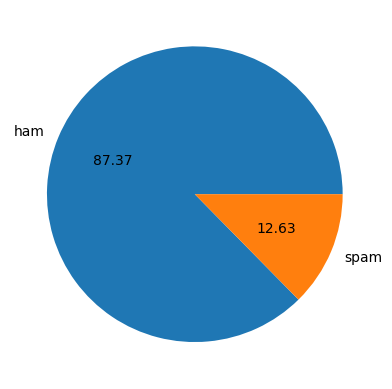

In [171]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [172]:
#according to abhove analysis we conclude data is imbalance

In [173]:
import nltk

In [174]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\KRITIKA
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [175]:
import nltk

In [176]:
print(nltk.data.path)

['C:\\Users\\KRITIKA SINGH/nltk_data', 'C:\\Python312\\nltk_data', 'C:\\Python312\\share\\nltk_data', 'C:\\Python312\\lib\\nltk_data', 'C:\\Users\\KRITIKA SINGH\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [177]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [178]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [179]:
df['num_char']=df['text'].apply(len)

In [180]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [181]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [182]:
#fetching the number of words

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [183]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [184]:
#fetching the number of sentences
df['num_senences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [185]:
df.head()

,target,text,num_char,num_words,num_senences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [186]:
df[['num_char','num_words',"num_senences"]].describe()

,num_char,num_words,num_senences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [187]:
#describe fun output for ham messages

df[df['target']==0][['num_char','num_words',"num_senences"]].describe()

,num_char,num_words,num_senences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [188]:
#for spam

df[df['target']==1][['num_char','num_words',"num_senences"]].describe()

,num_char,num_words,num_senences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [189]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

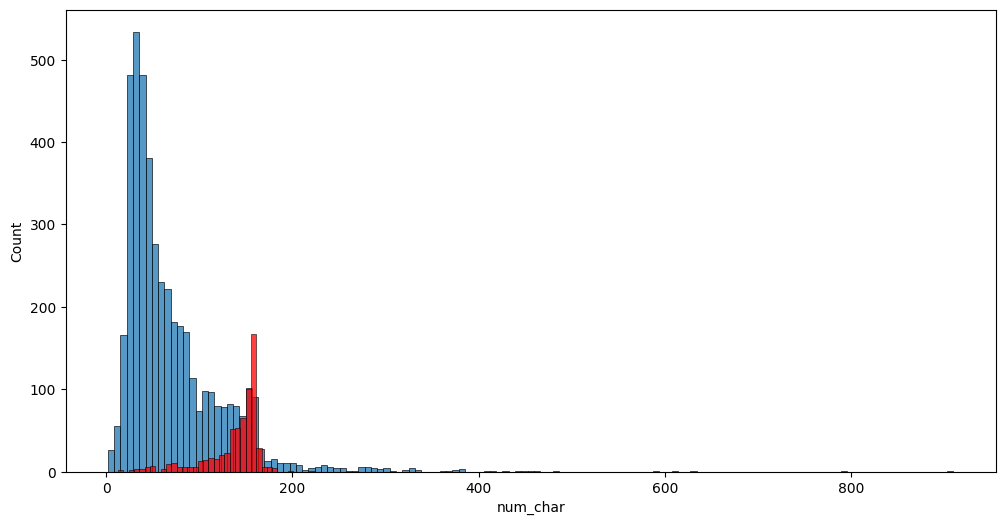

In [190]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

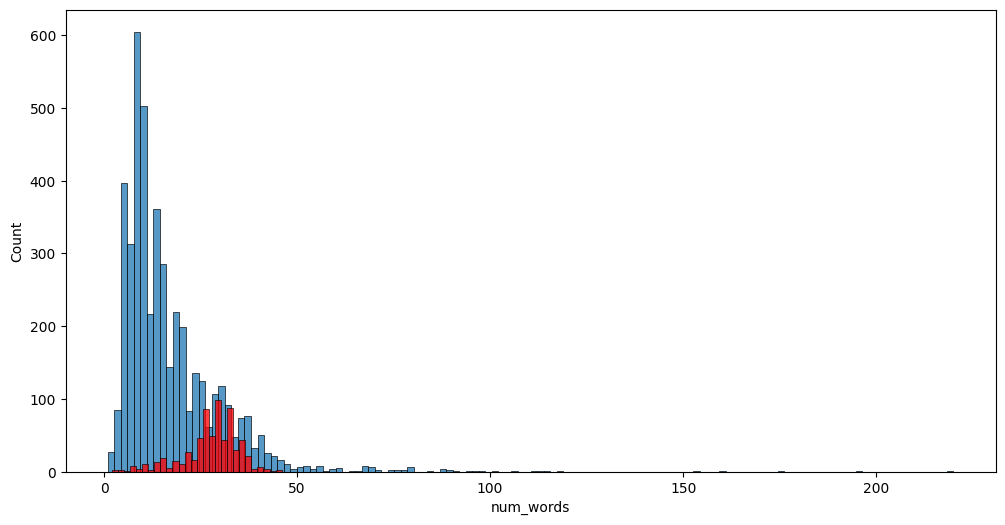

In [191]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

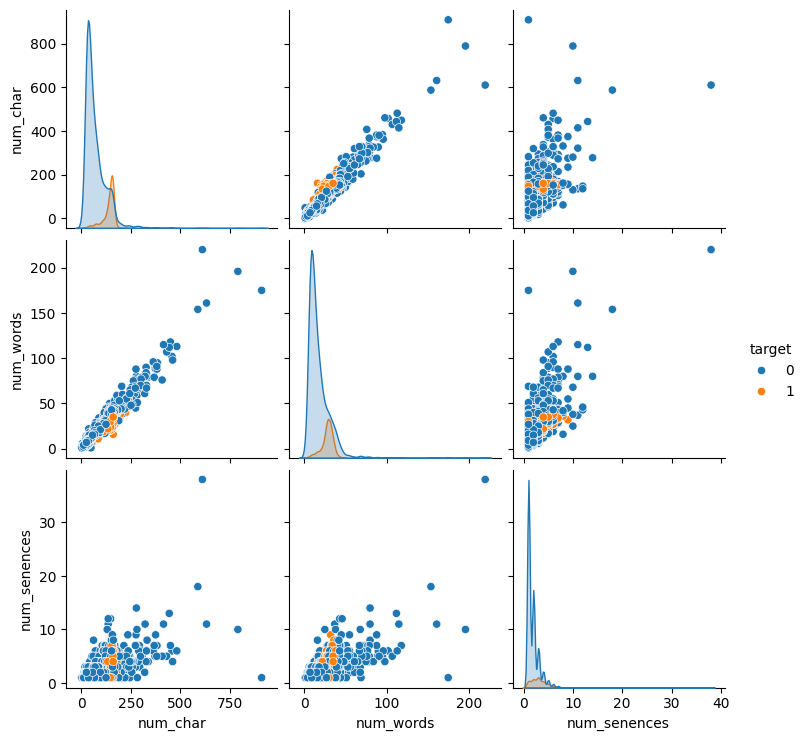

In [192]:
sns.pairplot(df,hue='target')

In [193]:
print(df.dtypes)

target           int64
text            object
num_char         int64
num_words        int64
num_senences     int64
dtype: object


In [194]:
df.isnull().sum()

target          0
text            0
num_char        0
num_words       0
num_senences    0
dtype: int64

<Axes: >

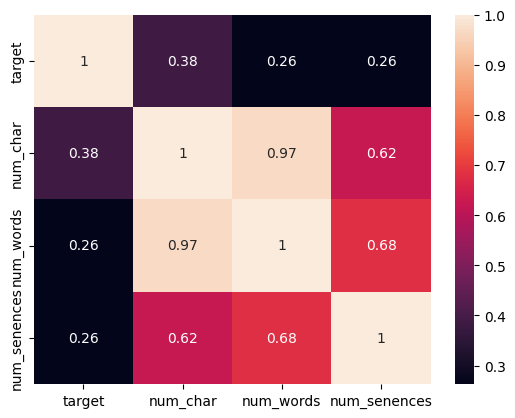

In [195]:
df_numeric = df.select_dtypes(include=[np.number])  # Select numerical columns
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True)

**3.Data Preprocessing**
* Lower case
* Tokenization
* Removing special character 
* Removing stop words and punctuation
* Stemming

In [196]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english') #we have to remove stopwords

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving') #it remove ing and ed from last
import string

[nltk_data] Downloading package stopwords to C:\Users\KRITIKA
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [197]:
def transformed_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [198]:
transformed_text("I love the YT videos on machine Learning. How about you?")

'love yt video machin learn'

In [199]:
#just for understanding how stopwords are removed look like
transformed_text("Did you like my Presentation ")

'like present'

In [200]:
df["text"][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [223]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [224]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [225]:
#just for understanding how stemming works
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("dancing")

'danc'

In [226]:
def transformed_text(text):
    # Add your transformation logic here
    return text.lower()  # Example: convert text to lowercase


In [227]:
df['transformed_text'] = df['text'].apply(transform_text)


In [228]:
df['transformed_text']=df['text'].apply(transform_text)

In [229]:
df.head()

,target,text,num_char,num_words,num_senences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i don't think he goes to usf, he lives aro..."


In [230]:
#creating word cloud

from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


In [231]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

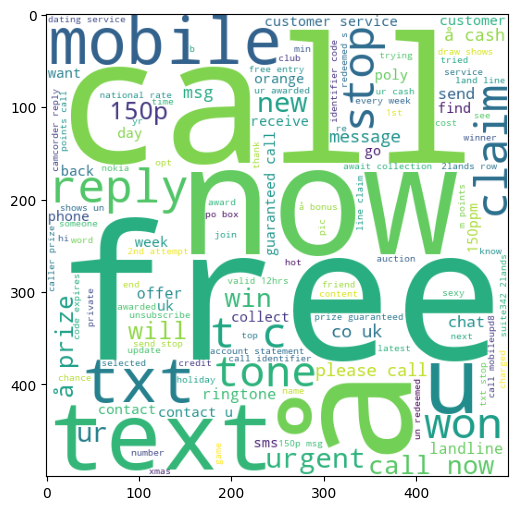

In [232]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [233]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

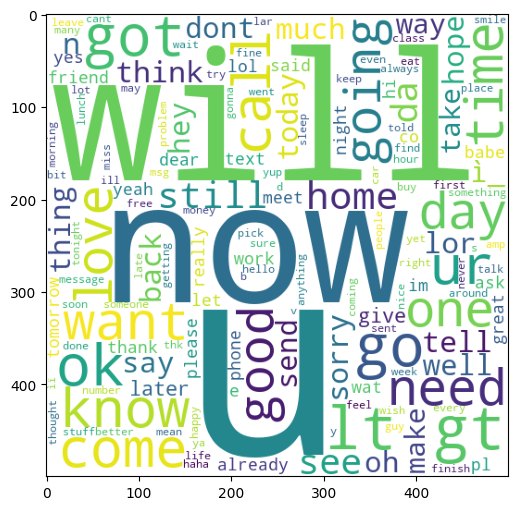

In [234]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [235]:
df.head()

,target,text,num_char,num_words,num_senences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i don't think he goes to usf, he lives aro..."


In [236]:
print(df.columns)

Index(['target', 'text', 'num_char', 'num_words', 'num_senences',
       'transformed_text'],
      dtype='object')


In [237]:
#list of string is created
#df[df['target']==1]['transformed_text'].tolist()

In [238]:
#for msg in df[df['target']==1]['transformed_text'].tolist():
 #   print(msg)

In [239]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [240]:
len(spam_corpus)

15464

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\KRITIKA SINGH\AppData\Local\Temp\ipykernel_10956\1005929196.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=spam_counter_df,palette='viridis')


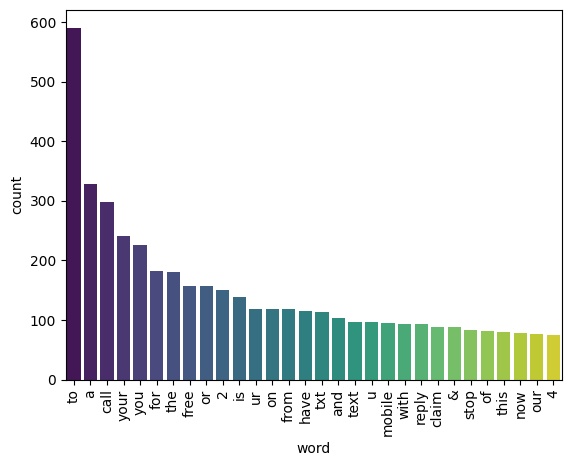

In [242]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the most common 30 items in the spam_corpus
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Create the bar plot
sns.barplot(x='word', y='count', data=spam_counter_df,palette='viridis')
plt.xticks(rotation='vertical')
plt.show()


In [243]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('to', 591),
 ('a', 328),
 ('call', 298),
 ('your', 241),
 ('you', 226),
 ('for', 182),
 ('the', 181),
 ('free', 157),
 ('or', 157),
 ('2', 151),
 ('is', 138),
 ('ur', 119),
 ('on', 118),
 ('from', 118),
 ('have', 115),
 ('txt', 114),
 ('and', 104),
 ('text', 96),
 ('u', 96),
 ('mobile', 95),
 ('with', 93),
 ('reply', 93),
 ('claim', 89),
 ('&', 89),
 ('stop', 83),
 ('of', 81),
 ('this', 80),
 ('now', 79),
 ('our', 77),
 ('4', 75)]

In [245]:
#from collections import counter
#sns.barplot(pd.Dataframe(counter(spam_corpus).most_common(30))[0],pd.Dataframe(counter(spam_corpus).most_common(30))[1])
#ply.xticks(rotation='vertical')
#plt.show()

In [246]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,to,591
1,a,328
2,call,298
3,your,241
4,you,226
5,for,182
6,the,181
7,free,157
8,or,157
9,2,151


In [247]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [248]:
len(ham_corpus)

63832

In [249]:
from collections import Counter

C:\Users\KRITIKA SINGH\AppData\Local\Temp\ipykernel_10956\18340436.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='frequency', data=most_common_words,palette='viridis')


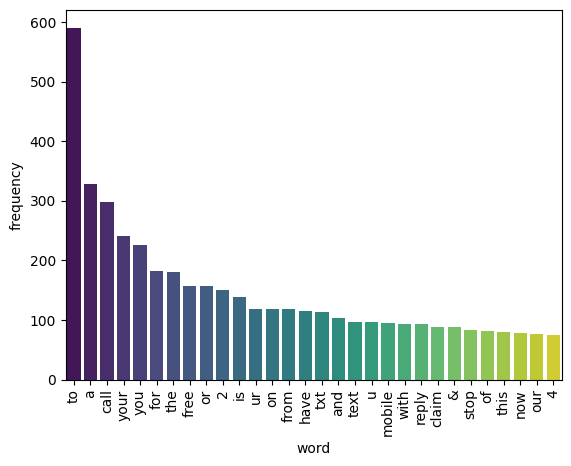

In [250]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter

# Assuming spam_corpus is a list of words from spam messages
spam_counter = Counter(spam_corpus)
most_common_words = pd.DataFrame(spam_counter.most_common(30))

# Rename columns for clarity (optional but recommended)
most_common_words.columns = ['word', 'frequency']

# Create the bar plot using explicit x and y parameters
sns.barplot(x='word', y='frequency', data=most_common_words,palette='viridis')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()


__4.Model Building__

In [251]:
#text vectorization
#using bag of words

df.head()

,target,text,num_char,num_words,num_senences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i don't think he goes to usf, he lives aro..."


In [252]:
df.shape

(5169, 6)

In [253]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [254]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [255]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [256]:
X.shape

(5169, 3000)

In [257]:
y=df['target'].values

In [258]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [261]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [267]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [268]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.902321083172147
[[813  83]
 [ 18 120]]
0.5911330049261084


In [269]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [270]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9854932301740812
[[893   3]
 [ 12 126]]
0.9767441860465116


In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [272]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [273]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    
}

In [274]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [275]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9835589941972921, np.float64(0.991869918699187))

In [276]:
accuracy_scores = []
precision_scores = []


for name,clf in clfs.items():
    
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9835589941972921
Precision -  0.991869918699187
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9748549323017408
Precision -  1.0
For  DT
Accuracy -  0.9410058027079303
Precision -  0.8888888888888888
For  LR
Accuracy -  0.960348162475822
Precision -  0.944954128440367
For  RF
Accuracy -  0.97678916827853
Precision -  1.0


C:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9700193423597679
Precision -  0.9421487603305785
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.896
For  ETC
Accuracy -  0.9816247582205029
Precision -  0.983739837398374
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9320388349514563


In [287]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [288]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.974855,1.000000
5,RF,0.976789,1.000000
0,SVC,0.983559,0.991870
8,ETC,0.981625,0.983740
4,LR,0.960348,0.944954
6,AdaBoost,0.970019,0.942149
9,GBDT,0.952611,0.932039
7,BgC,0.962282,0.896000
3,DT,0.941006,0.888889


In [289]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [290]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,NB,Accuracy,0.974855
2,RF,Accuracy,0.976789
3,SVC,Accuracy,0.983559
4,ETC,Accuracy,0.981625
5,LR,Accuracy,0.960348
6,AdaBoost,Accuracy,0.970019
7,GBDT,Accuracy,0.952611
8,BgC,Accuracy,0.962282
9,DT,Accuracy,0.941006


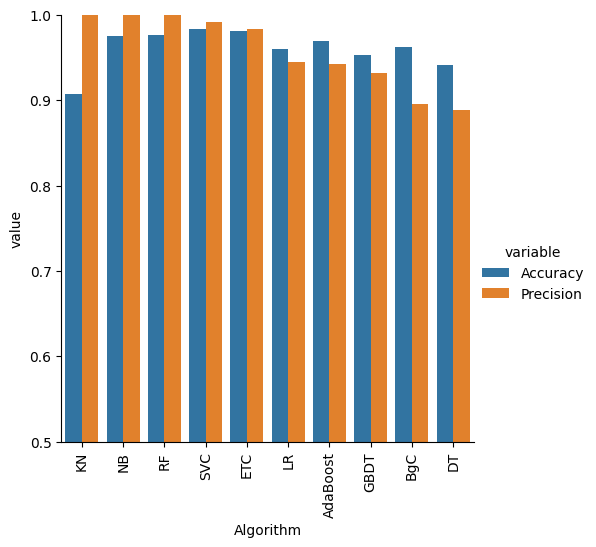

In [291]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [292]:
# model improve
# 1. Change the max_features parameter of TfIdf

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [293]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [294]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [295]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [296]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [297]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000
1,NB,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000
2,RF,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000
3,SVC,0.983559,0.991870,0.983559,0.991870,0.983559,0.991870,0.983559,0.991870
4,ETC,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740
5,LR,0.960348,0.944954,0.960348,0.944954,0.960348,0.944954,0.960348,0.944954
6,AdaBoost,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149
7,GBDT,0.952611,0.932039,0.952611,0.932039,0.952611,0.932039,0.952611,0.932039
8,BgC,0.962282,0.896000,0.962282,0.896000,0.962282,0.896000,0.962282,0.896000
9,DT,0.941006,0.888889,0.941006,0.888889,0.941006,0.888889,0.941006,0.888889


In [298]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [299]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [300]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [301]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9864603481624759
Precision 1.0


In [302]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [303]:
from sklearn.ensemble import StackingClassifier

In [304]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [305]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9874274661508704
Precision 0.9629629629629629


In [306]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))